In [3]:
%pylab inline
import numpy as np
import netCDF4 as netCDF
import datetime
import matplotlib.pyplot as plt
import tracpy.tools
import tracpy
import cartopy.crs as ccrs
import cmocean as cmo
import cartopy
import tracpy.plotting
import octant
from matplotlib import cm, colors

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [4]:
proj = tracpy.tools.make_proj('nwgom-pyproj')
loc = "http://barataria.tamu.edu:8080/thredds/dodsC/NcML/txla_hindcast_agg"
grid = tracpy.inout.readgrid(loc, proj, usespherical=True)

In [5]:
lonps = np.zeros((0,1441))
latps = np.zeros((0,1441))
zps = np.zeros((0,1441))

for day in range(1,32):
    dd = netCDF.Dataset("tracks/2016/3d_July%d.nc" %(day))
    print( dd["lonp"][412:,:].shape )
    print(lonps.shape)
    lonps = np.append( lonps, dd["lonp"][412:,:], axis=0 )
    latps = np.append( latps, dd["latp"][412:,:], axis=0 )
    zps = np.append( zps, dd["zp"][412:,:], axis=0 )



/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in greater
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()


(206, 1441)
(0, 1441)
(206, 1441)
(206, 1441)
(206, 1441)
(412, 1441)
(206, 1441)
(618, 1441)
(206, 1441)
(824, 1441)
(206, 1441)
(1030, 1441)
(206, 1441)
(1236, 1441)
(206, 1441)
(1442, 1441)
(206, 1441)
(1648, 1441)
(206, 1441)
(1854, 1441)
(206, 1441)
(2060, 1441)
(206, 1441)
(2266, 1441)
(206, 1441)
(2472, 1441)
(206, 1441)
(2678, 1441)
(206, 1441)
(2884, 1441)
(206, 1441)
(3090, 1441)
(206, 1441)
(3296, 1441)
(206, 1441)
(3502, 1441)
(206, 1441)
(3708, 1441)
(206, 1441)
(3914, 1441)
(206, 1441)
(4120, 1441)
(206, 1441)
(4326, 1441)
(206, 1441)
(4532, 1441)
(206, 1441)
(4738, 1441)
(206, 1441)
(4944, 1441)
(206, 1441)
(5150, 1441)
(206, 1441)
(5356, 1441)
(206, 1441)
(5562, 1441)
(206, 1441)
(5768, 1441)
(206, 1441)
(5974, 1441)
(206, 1441)
(6180, 1441)


In [5]:
zps.shape

(6386, 1441)

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


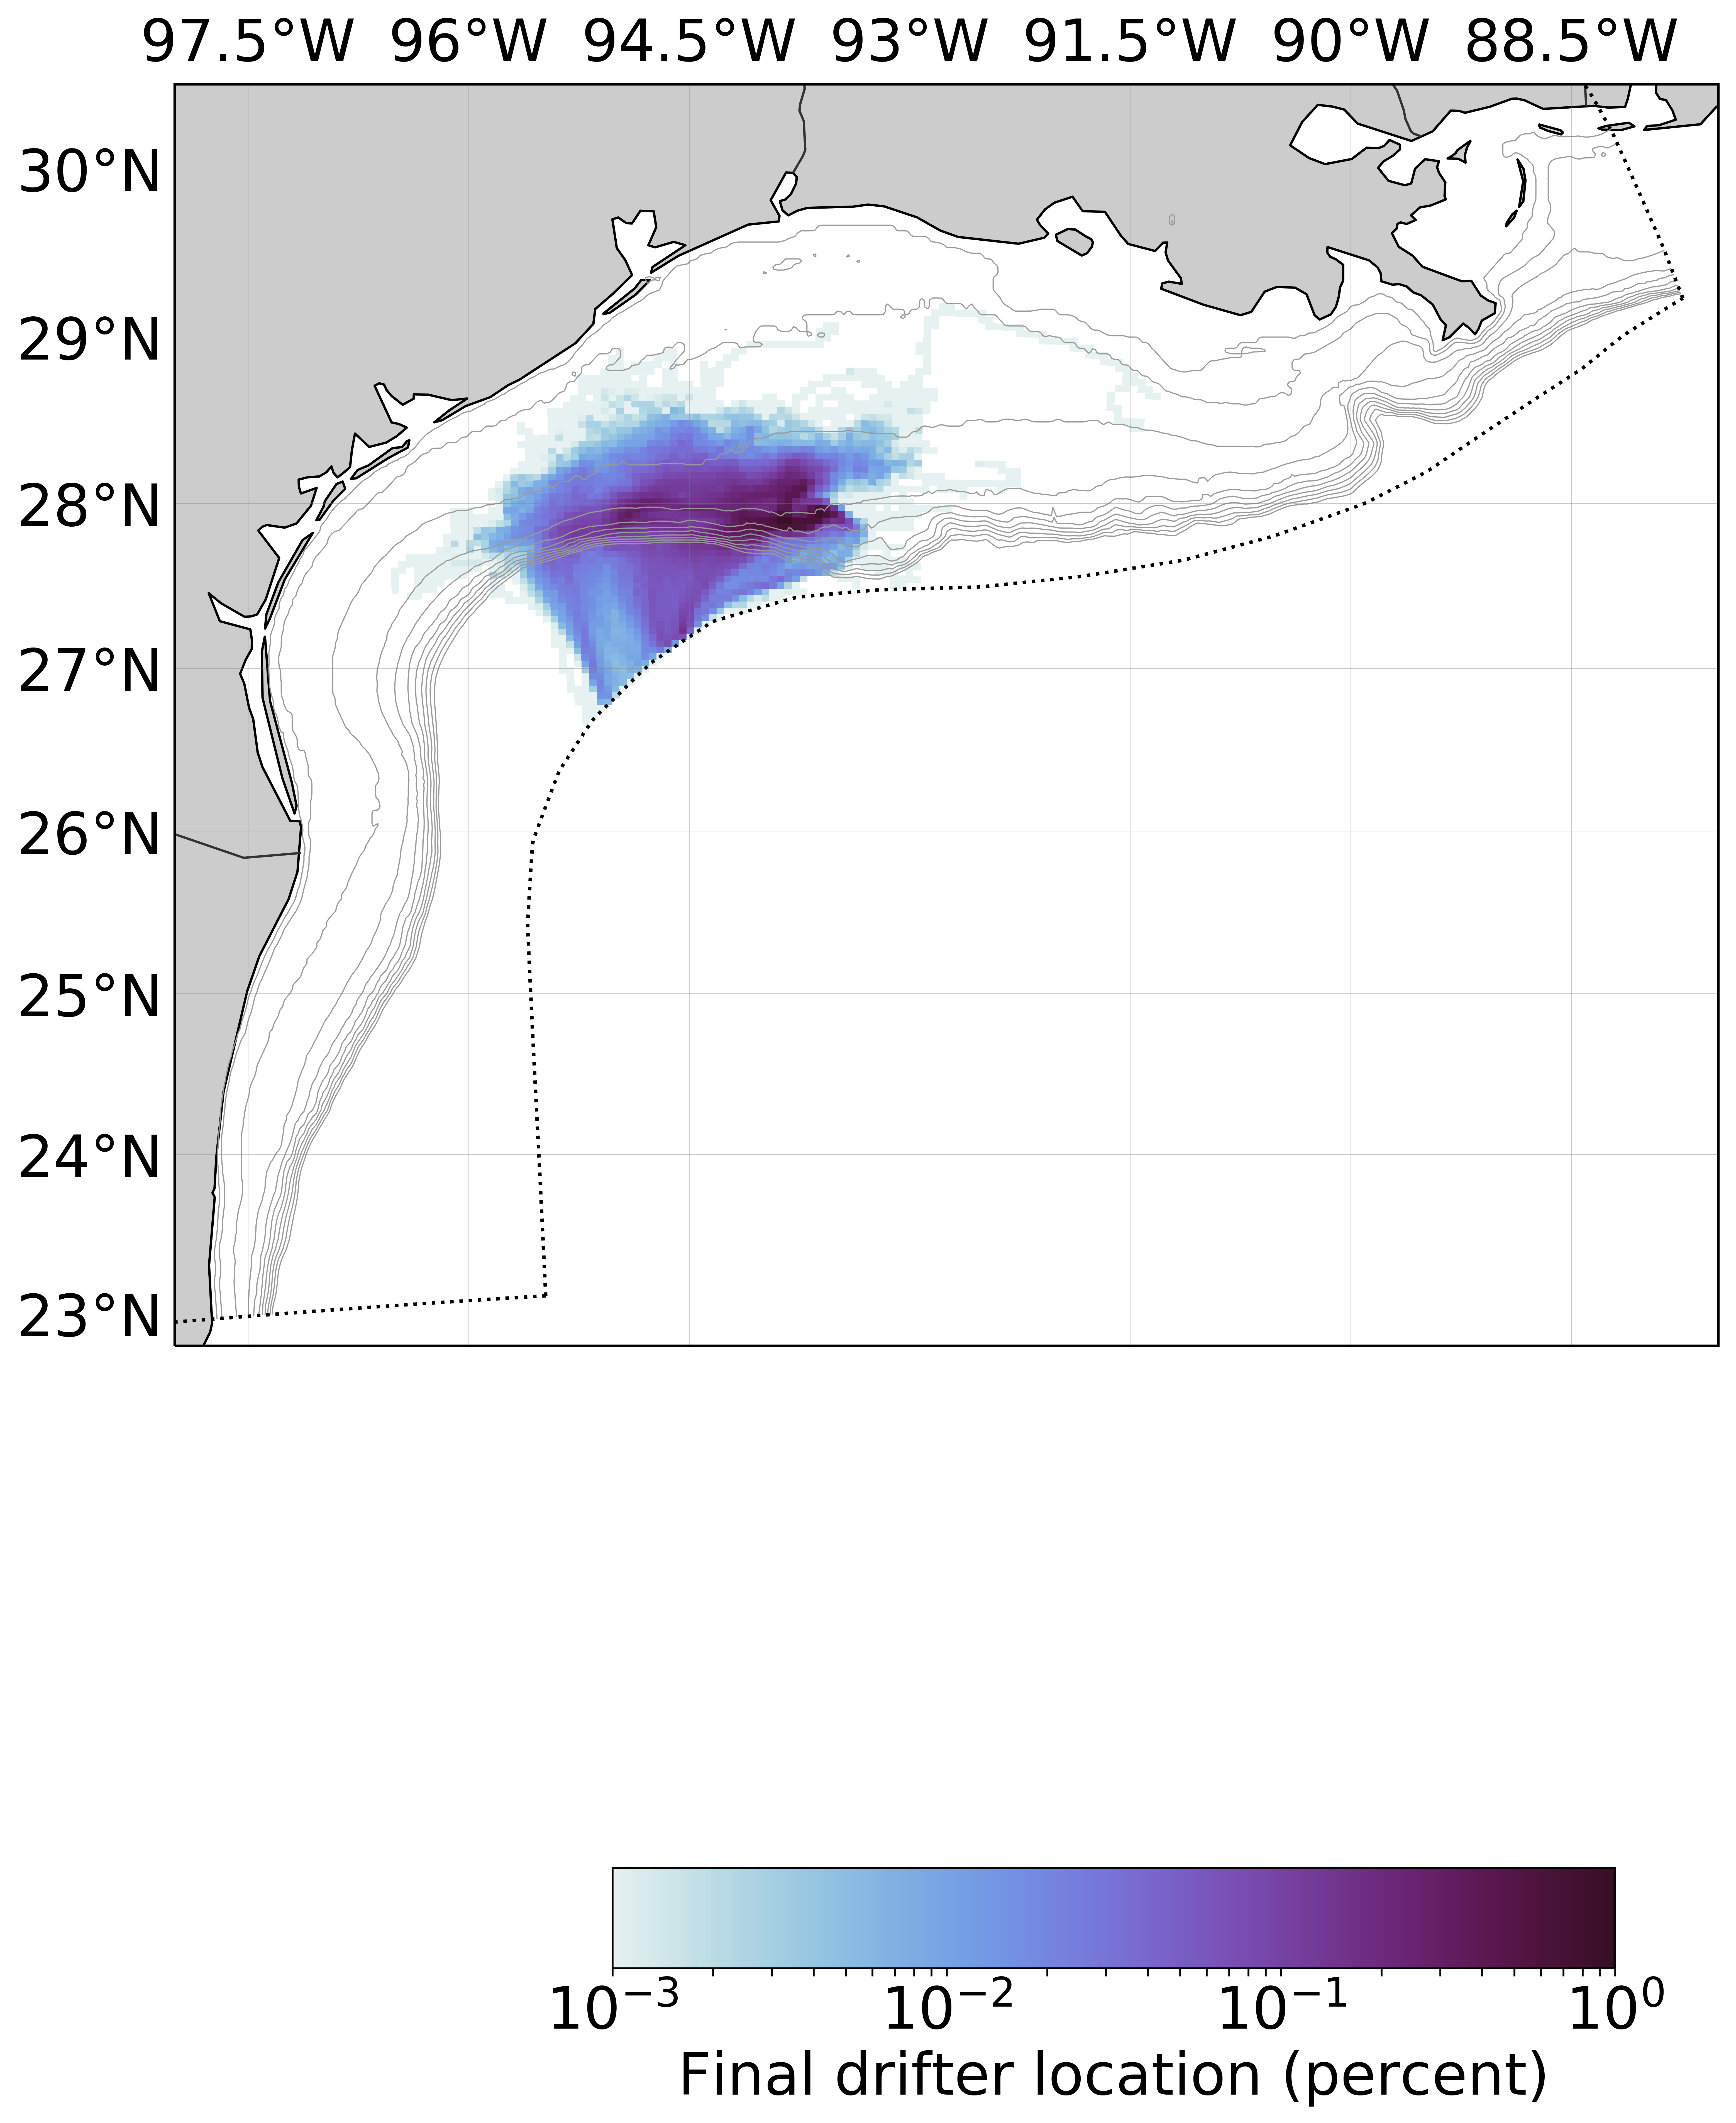

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=600, tight_layout=True, subplot_kw=dict(projection=cartopy.crs.Mercator()))
fig.tight_layout()
tracpy.plotting.background(grid, ax=ax, fig=fig, extent=[-98, -87.5, 22.8, 30.5],
                           col='lightgrey', halpha=1, outline=[1, 1, 0, 1], res='50m',
                          fontsize=25)    # ,range=[[-422893.1840546361, 607114.2511548102],[-773600.0225372436, 105158.33625709431]]

x, y = proj( lonps, latps )

# plt.scatter( lonps, latps, c=zps)
# plt.colorbar()
tracpy.plotting.hist(np.asarray(x), np.asarray(y), proj, "deep_tracks_hist", grid, tind='all', which='pcolor',
                         cbcoords=[0.3,0, 0.6, 0.04], cmap=cmo.cm.dense,
                         fig=fig, ax=ax, bins=(200, 200), N=100, xlims=None,
                         ylims=None, C=None, weights=None,
                         Label='Drifter locations (%)', binscale=None, logscale=True, vmax=1,
                         crsproj=cartopy.crs.LambertConformal(central_latitude= 30, central_longitude=-94))

In [15]:
x

array([[ 3.48951331e+04,  3.43386490e+04,  3.38640345e+04, ...,
         1.00000000e+30,  1.00000000e+30,  1.00000000e+30],
       [ 3.58947607e+04,  3.54027044e+04,  3.49246706e+04, ...,
         1.00000000e+30,  1.00000000e+30,  1.00000000e+30],
       [ 3.68944148e+04,  3.64198974e+04,  3.59975334e+04, ...,
         1.00000000e+30,  1.00000000e+30,  1.00000000e+30],
       ...,
       [ 1.86830481e+04,  1.88956458e+04,  1.91197891e+04, ...,
        -9.95203426e+04, -9.97404081e+04, -9.99777702e+04],
       [ 1.96828042e+04,  1.98616847e+04,  2.00423789e+04, ...,
         5.23751350e+04,  5.22705829e+04,  5.22149348e+04],
       [ 2.06834919e+04,  2.07852104e+04,  2.09751128e+04, ...,
         6.36531721e+03,  6.45920809e+03,  6.51791181e+03]])

In [9]:
plt.colorbar()

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

In [22]:
# 2015

lonps15 = np.zeros((0,1441))
latps15 = np.zeros((0,1441))
zps15 = np.zeros((0,1441))

for day in range(1,32):
    dd = netCDF.Dataset("tracks/2015/3d_July%d.nc" %(day))
    print( dd["lonp"][412:,:].shape )
    print(lonps.shape)
    lonps15 = np.append( lonps15, dd["lonp"][:206,:], axis=0 )
    latps15 = np.append( latps15, dd["latp"][:206,:], axis=0 )
    zps15 = np.append( zps15, dd["zp"][412:,:], axis=0 )

/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in greater
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':
/opt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)
(206, 1441)
(6386, 1441)


KeyboardInterrupt: 

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


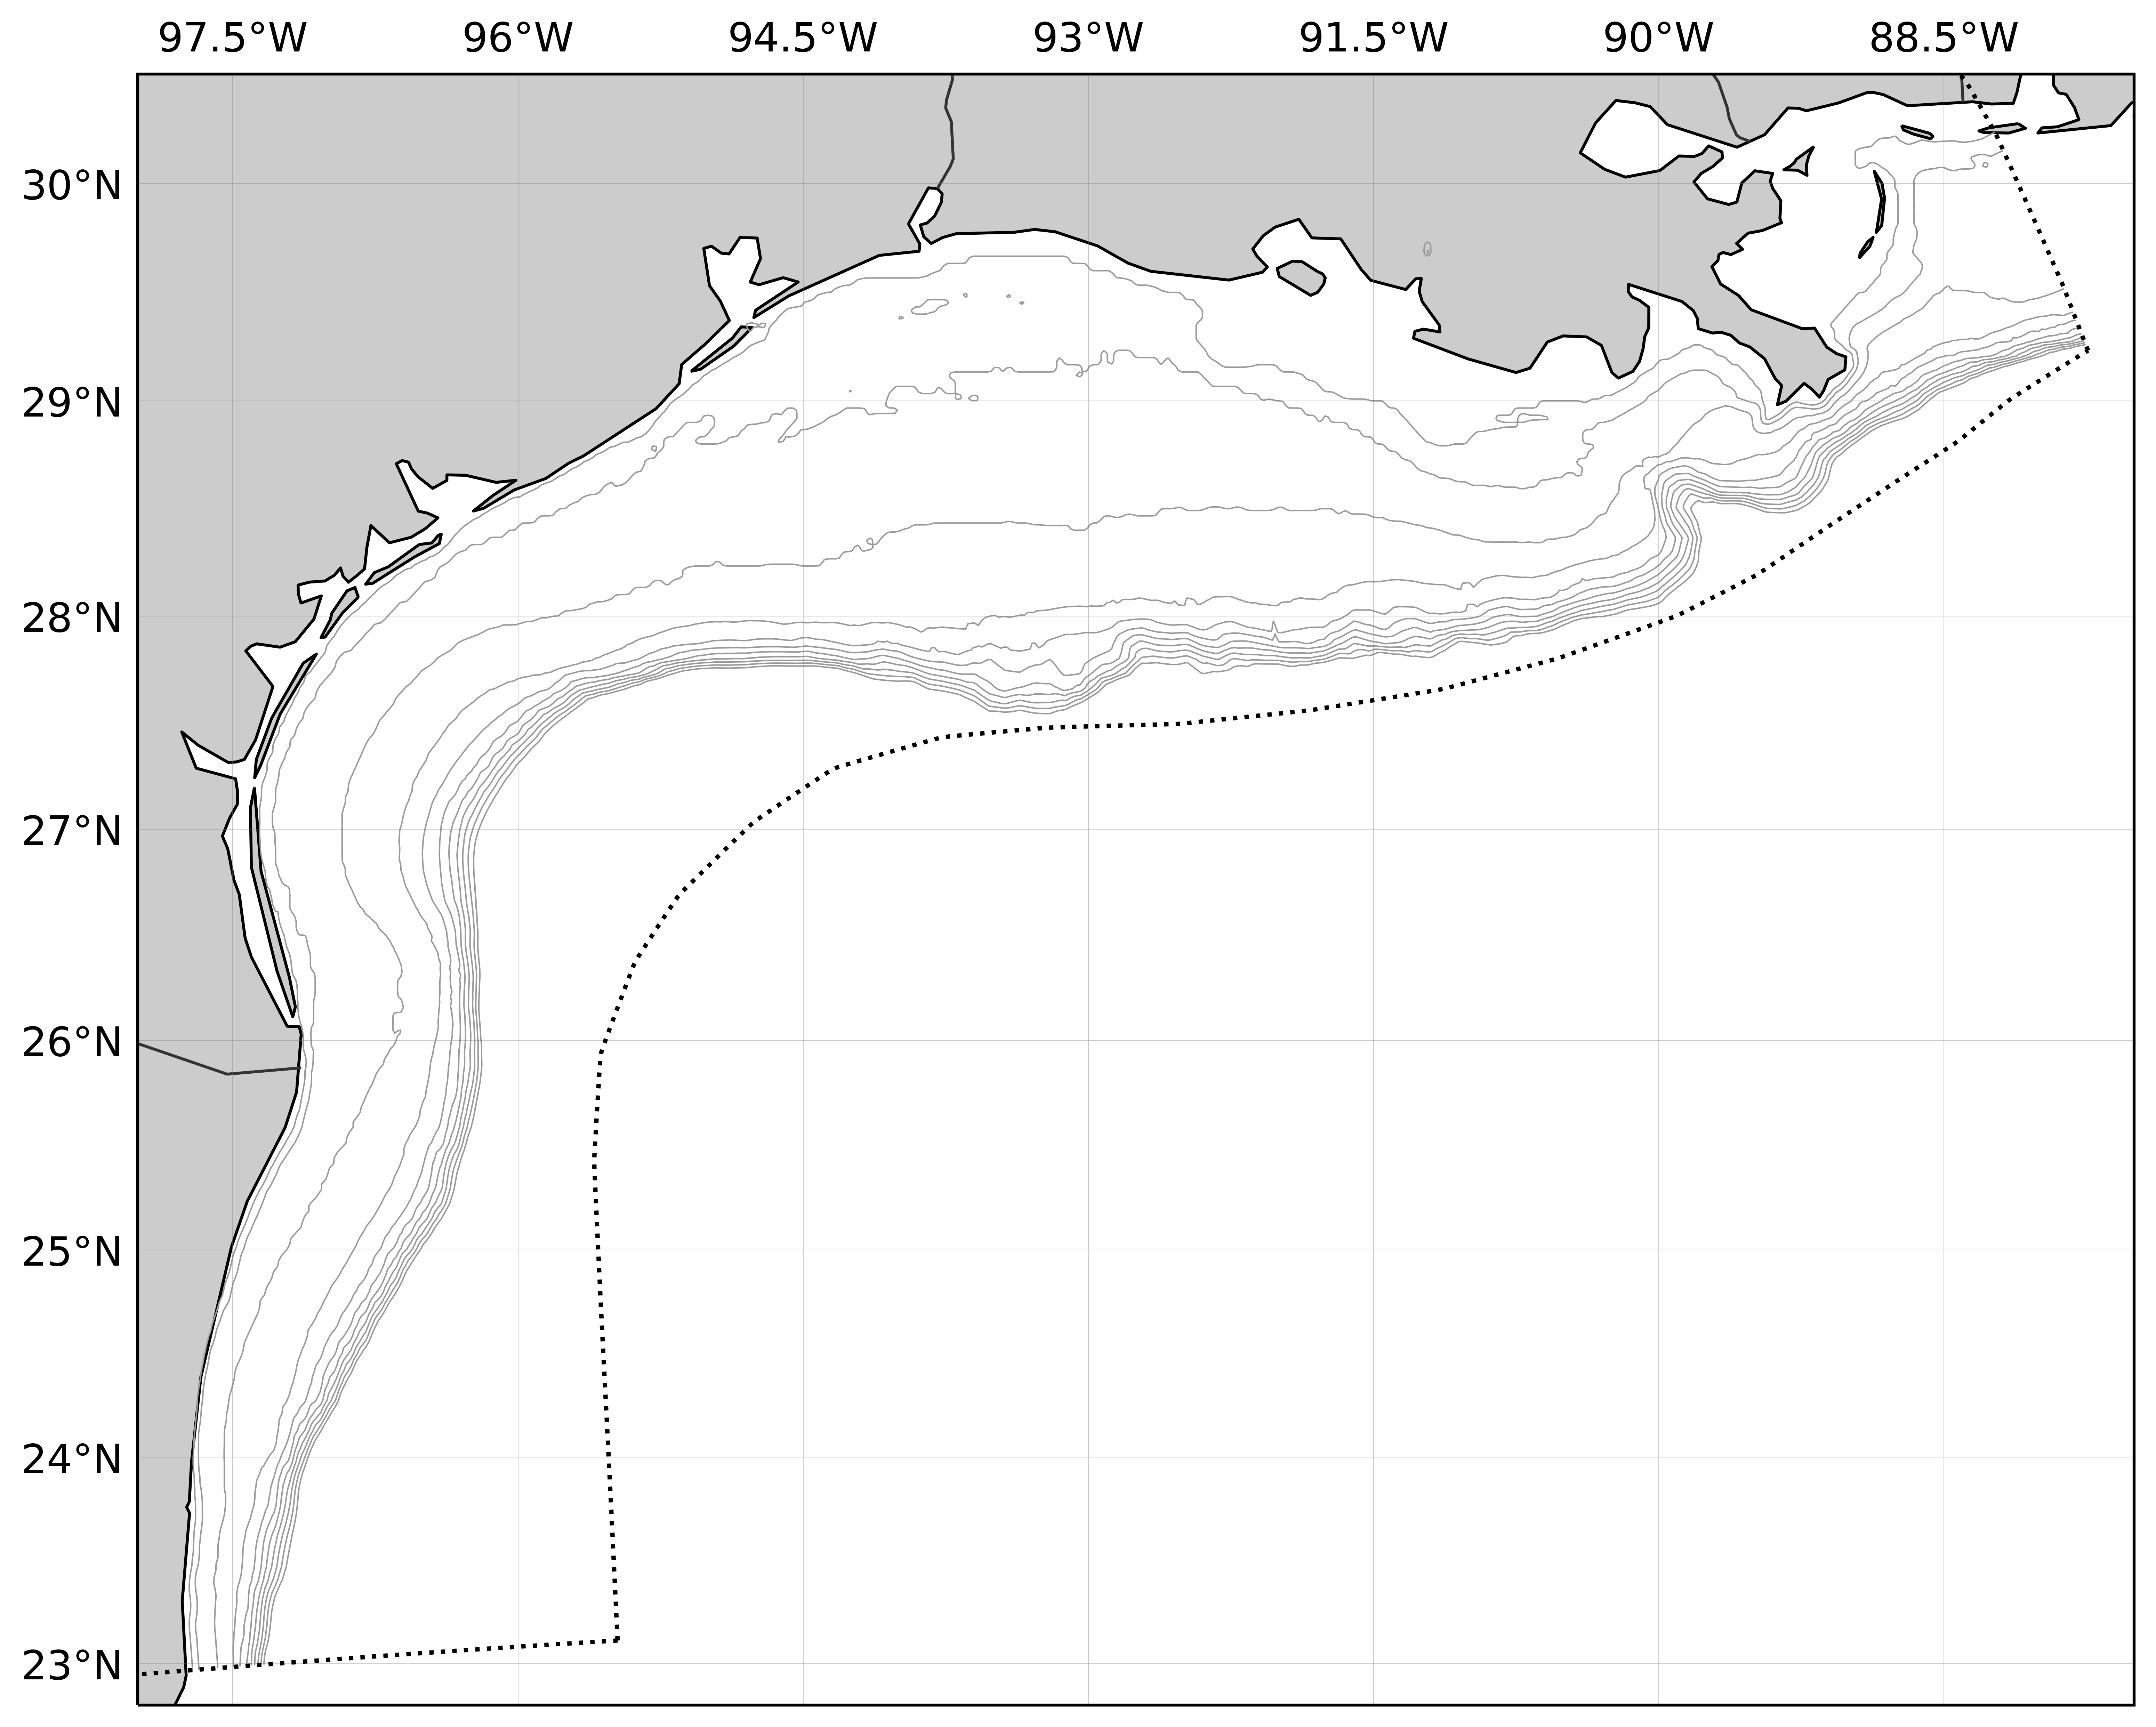

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(10, 15), dpi=600, tight_layout=True, subplot_kw=dict(projection=cartopy.crs.Mercator()))
fig.tight_layout()
tracpy.plotting.background(grid, ax=ax, fig=fig, extent=[-98, -87.5, 22.8, 30.5],
                           col='lightgrey', halpha=1, outline=[1, 1, 0, 1], res='50m')    # ,range=[[-422893.1840546361, 607114.2511548102],[-773600.0225372436, 105158.33625709431]]

x, y = proj( lonps15, latps15 )

# plt.scatter( lonps, latps, c=zps)
# plt.colorbar()
tracpy.plotting.hist(np.asarray(x), np.asarray(y), proj, "deep_tracks_hist_2015", grid, tind='all', which='pcolor',
                         cbcoords=[0.3,0, 0.6, 0.04], cmap=cmo.cm.dense,
                         fig=fig, ax=ax, bins=(200, 200), N=100, xlims=None,
                         ylims=None, C=None, weights=None,
                         Label='Drifter locations (%)', binscale=None, logscale=True, vmax=1,
                         crsproj=cartopy.crs.LambertConformal(central_latitude= 30, central_longitude=-94))